# EXPERIMENT 1F

# (CONTRIBUTER :YOGESH)

In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
from sklearn.metrics import confusion_matrix , classification_report

In [3]:
# Importing libraries

import matplotlib.pyplot as plt
#from google.colab import files
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

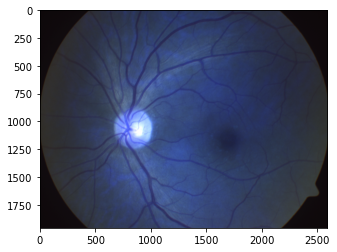

(2000, 2000)

In [4]:
# Loading the data from the drive and saving it to Categories
DATADIR ="C:\\Users\\hp\\Downloads\\Cp\\Balanced"
CATEGORIES = ['0','1','2','3','4']

# a loop to read 1 image of a category to check if the code would work 

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array,cmap= 'gray')
        plt.show()
        break
    break

# creating the training dataset using the images of all 5 categories

training_data = []
IMG_SIZE = 200
def create_training_data():  # function to create an array of images
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            try:
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # resizing the image
            except:
                continue
            training_data.append([new_array,class_num])

create_training_data()


len(training_data)

# empty lists to append images and labels
X = []
y = []

# appending images to list X and labels to list Y
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)

len(X),len(y)

In [5]:
# importing library
from sklearn.model_selection import train_test_split

# splitting the data into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# normalising the data

X_train = X_train/255
X_test = X_test/255

# converting the train and test data into arrays

X_train = np.array(X_train)
X_test = np.array(X_test)

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model

In [7]:
#from keras.applications.resnet50 import ResNet50


In [8]:
pre_trained_model = InceptionV3(input_shape = (200,200, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

last_layer = pre_trained_model.get_layer('mixed7') #Only use layers including and above 'mixed7'
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

last layer output shape:  (None, 10, 10, 768)
last layer output shape:  (None, 10, 10, 768)


In [9]:
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [10]:
model.fit(np.array(X_train), np.array(y_train), epochs=10)
#history = model.fit(
#            X_train,y_train)

Epoch 1/10
44/44 [==============================] - 408s 9s/step - loss: 1.3811 - accuracy: 0.4893
Epoch 2/10
44/44 [==============================] - 375s 9s/step - loss: 0.5812 - accuracy: 0.7864
Epoch 3/10
44/44 [==============================] - 373s 8s/step - loss: 0.2562 - accuracy: 0.9207
Epoch 4/10
44/44 [==============================] - 372s 8s/step - loss: 0.1668 - accuracy: 0.9500
Epoch 5/10
44/44 [==============================] - 372s 8s/step - loss: 0.0867 - accuracy: 0.9764
Epoch 6/10
44/44 [==============================] - 373s 8s/step - loss: 0.1011 - accuracy: 0.9671
Epoch 7/10
44/44 [==============================] - 373s 8s/step - loss: 0.0613 - accuracy: 0.9771
Epoch 8/10
44/44 [==============================] - 370s 8s/step - loss: 0.0757 - accuracy: 0.9729
Epoch 9/10
44/44 [==============================] - 370s 8s/step - loss: 0.0765 - accuracy: 0.9786
Epoch 10/10
44/44 [==============================] - 371s 8s/step - loss: 0.0679 - accuracy: 0.9757


In [11]:
y_pred = model.predict(X_test)
y_pred[:20]

19/19 [==============================] - 32s 1s/step


array([[1.00000000e+00, 1.01126156e-25, 7.81426334e-29, 4.91366630e-33,
        3.18706480e-36],
       [1.00000000e+00, 4.62722055e-10, 7.77301125e-18, 1.31039023e-22,
        2.95299430e-25],
       [1.00000000e+00, 7.76578193e-25, 1.49382811e-27, 5.68425634e-32,
        2.83730100e-32],
       [1.12480166e-05, 9.99988794e-01, 1.37731374e-12, 1.15461708e-22,
        3.42515412e-18],
       [1.02826998e-05, 3.30464360e-07, 9.99989152e-01, 3.84749010e-10,
        2.40684045e-07],
       [9.29714044e-20, 6.76649354e-23, 1.07475473e-10, 9.97397780e-01,
        2.60222703e-03],
       [9.57156499e-06, 5.42997780e-09, 9.99989748e-01, 1.86452851e-07,
        4.47057118e-07],
       [1.78576652e-18, 1.00000000e+00, 3.79054887e-17, 1.55619815e-22,
        7.48526106e-22],
       [1.07075874e-14, 1.54031980e-18, 9.19284115e-09, 7.61827990e-10,
        1.00000000e+00],
       [5.13767660e-08, 9.84491527e-01, 1.55084888e-02, 1.87257314e-13,
        7.52264384e-09],
       [5.48722164e-05, 9.9994

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

19/19 [==============================] - 28s 1s/step


In [13]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       126
           1       0.78      0.65      0.71       143
           2       0.50      0.50      0.50       107
           3       0.72      0.81      0.77       113
           4       0.72      0.61      0.66       111

    accuracy                           0.72       600
   macro avg       0.71      0.71      0.71       600
weighted avg       0.72      0.72      0.71       600



In [14]:
y_pred_classes

[0,
 0,
 0,
 1,
 2,
 3,
 2,
 1,
 4,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 2,
 0,
 4,
 1,
 0,
 1,
 2,
 3,
 0,
 3,
 1,
 0,
 2,
 1,
 2,
 1,
 3,
 0,
 3,
 1,
 4,
 1,
 0,
 3,
 3,
 0,
 1,
 3,
 0,
 4,
 1,
 3,
 3,
 2,
 2,
 0,
 1,
 2,
 3,
 3,
 0,
 3,
 4,
 3,
 1,
 1,
 1,
 2,
 3,
 1,
 3,
 2,
 3,
 3,
 0,
 4,
 1,
 0,
 0,
 4,
 2,
 2,
 2,
 1,
 2,
 4,
 3,
 3,
 4,
 0,
 3,
 1,
 0,
 3,
 4,
 1,
 1,
 2,
 0,
 4,
 3,
 0,
 3,
 2,
 2,
 4,
 3,
 0,
 3,
 2,
 0,
 2,
 0,
 4,
 4,
 2,
 3,
 1,
 1,
 4,
 0,
 2,
 2,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 0,
 1,
 4,
 1,
 1,
 4,
 4,
 4,
 4,
 1,
 4,
 0,
 0,
 3,
 4,
 1,
 1,
 1,
 0,
 4,
 4,
 2,
 1,
 1,
 3,
 1,
 2,
 0,
 4,
 0,
 4,
 3,
 1,
 3,
 4,
 1,
 4,
 3,
 0,
 0,
 1,
 4,
 4,
 1,
 3,
 0,
 1,
 3,
 0,
 0,
 3,
 0,
 3,
 0,
 2,
 1,
 0,
 0,
 1,
 3,
 4,
 1,
 0,
 4,
 0,
 2,
 0,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 1,
 1,
 4,
 4,
 4,
 3,
 3,
 1,
 1,
 3,
 0,
 3,
 0,
 1,
 3,
 2,
 3,
 2,
 0,
 0,
 3,
 2,
 0,
 4,
 0,
 3,
 3,
 1,
 2,
 0,
 3,
 1,
 4,
 4,
 0,
 0,
 3,
 2,
 0,
 1,
 2,
 3,
 3,
 0,
 3,
 3,
 2,
 2,
 1,
 3,


In [15]:
model.save('MODELinceptionv31610Abalancednoprep.h5')

In [16]:
confusion_matrix(y_test, y_pred_classes)

array([[123,   1,   1,   1,   0],
       [ 20,  93,  23,   3,   4],
       [  7,  20,  54,  15,  11],
       [  0,   2,   8,  92,  11],
       [  3,   3,  21,  16,  68]], dtype=int64)